ToDo:
* Do other cost functions further decrease the loss?

In [13]:
%reset
%env MUJOCO_PY_MJKEY_PATH=/home/had/rl/mjpro131/bin/mjkey.txt
%env MUJOCO_PY_MJPRO_PATH=/home/had/rl/mjpro131

env: MUJOCO_PY_MJKEY_PATH=/home/had/rl/mjpro131/bin/mjkey.txt
env: MUJOCO_PY_MJPRO_PATH=/home/had/rl/mjpro131


{'CLICOLOR': '1',
 'CLUTTER_IM_MODULE': 'xim',
 'COMPIZ_BIN_PATH': '/usr/bin/',
 'COMPIZ_CONFIG_PROFILE': 'ubuntu',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:abstract=/tmp/dbus-E991n4i5Dv',
 'DEFAULTS_PATH': '/usr/share/gconf/ubuntu.default.path',
 'DERBY_HOME': '/usr/lib/jvm/java-8-oracle/db',
 'DESKTOP_SESSION': 'ubuntu',
 'DISPLAY': ':0',
 'GDMSESSION': 'ubuntu',
 'GDM_LANG': 'en_US',
 'GIO_LAUNCHED_DESKTOP_FILE': '/home/had/.local/share/applications/jetbrains-pycharm-ce.desktop',
 'GIO_LAUNCHED_DESKTOP_FILE_PID': '7345',
 'GIT_PAGER': 'cat',
 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated',
 'GNOME_KEYRING_CONTROL': '',
 'GNOME_KEYRING_PID': '',
 'GPG_AGENT_INFO': '/home/had/.gnupg/S.gpg-agent:0:1',
 'GTK2_MODULES': 'overlay-scrollbar',
 'GTK_IM_MODULE': 'ibus',
 'GTK_MODULES': 'gail:atk-bridge:unity-gtk-module',
 'HOME': '/home/had',
 'ICPP_COMPILER17': '/opt/intel',
 'IM_CONFIG_PHASE': '1',
 'INSTANCE': '',
 'J2REDIR': '/usr/lib/jvm/java-8-oracle/jre',
 'J2SDKDIR': '/usr/lib/jvm/java-8

In [15]:
import pickle
import tensorflow as tf
import numpy as np
import tf_util
import gym
import load_policy
import matplotlib.pyplot as plt

import miscellaneous as msc

Model

In [16]:
expert_policy_file = "experts/Hopper-v1.pkl"
envname = "Hopper-v1"
render = False
num_rollouts = 5

In [17]:
policy_fn = load_policy.load_policy(expert_policy_file)

('obs', (1, 11), (1, 11))


SET UP tensorflow    

In [18]:
input = tf.placeholder(tf.float32, shape=(1,11))
label = tf.placeholder(tf.float32, shape=(1,3))
pred = msc.neural_network(input)

cost = tf.losses.absolute_difference(label, pred)
train_step = tf.train.AdamOptimizer(1e-4).minimize(cost)



returns = []

[2017-09-17 11:14:10,440] Making new env: Hopper-v1


DependencyNotInstalled: cannot import name config. (HINT: you need to install mujoco_py, and also perform the setup instructions here: https://github.com/openai/mujoco-py/.)

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

observations = []
actions = []
for i in range(num_rollouts):
    observations_rollout, actions_rollout = rollout()
    observations += observations_rollout
    actions += actions_rollout

NameError: name 'rollout' is not defined

Learn new policy

In [35]:
predicted_actions = []
for k in range(1):
    for observation, action in zip(observations, actions):
        train_step.run(feed_dict={input: observation, label: action})
        pred_action = sess.run(pred, feed_dict={input: observation})
        predicted_actions.append(pred_action)

In [36]:
predicted_actions_array = np.array(predicted_actions)
actual_actions_array = np.array(actions)
evaluated_cost = np.sum(np.abs(actual_actions_array-predicted_actions_array),axis=2)

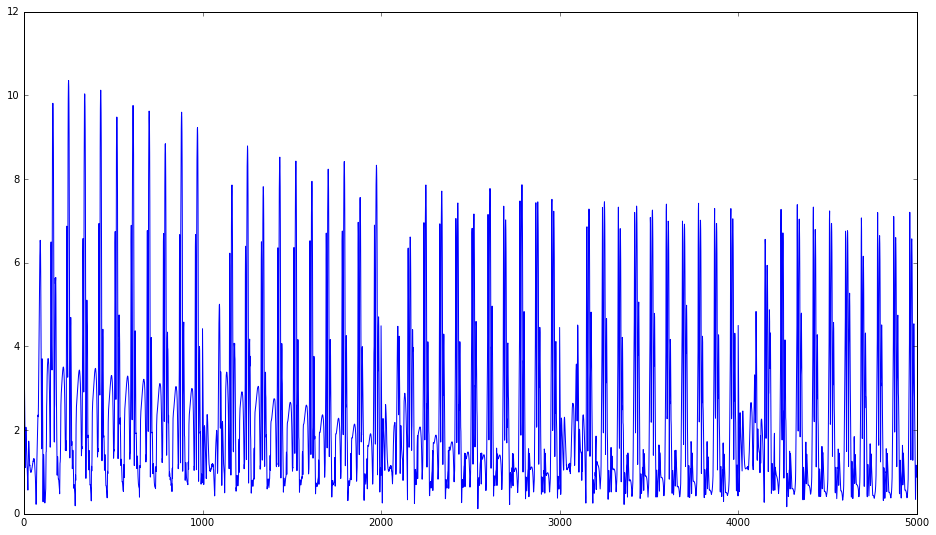

In [37]:
plt.figure(figsize=(16,9))
plt.plot(evaluated_cost)
plt.show()

In [10]:
# Simulate learned policy
obs = env.reset()
done = False
while not done:
    pred_action = sess.run(pred, feed_dict={input: obs.reshape(1,11)})

    obs, r, done, _ = env.step(pred_action)
    env.render()

KeyboardInterrupt: 